In [1]:
import Pkg
Pkg.activate(".")

  Activating project at `~/Documents/programming/BME-574-2024-homeworks`


In [4]:
Pkg.add(["Images","MAT","Colors","LinearAlgebra","MLDatasets","CairoMakie","DataFrames"])

   Resolving package versions...
    Updating `~/Documents/programming/BME-574-2024-homeworks/Project.toml`
  [a93c6f00] + DataFrames v1.7.0
  No Changes to `~/Documents/programming/BME-574-2024-homeworks/Manifest.toml`


In [5]:
using MLDatasets, CairoMakie, DataFrames

In [6]:
iris = Iris()

dataset Iris:
  metadata   =>    Dict{String, Any} with 4 entries
  features   =>    150×4 DataFrame
  targets    =>    150×1 DataFrame
  dataframe  =>    150×5 DataFrame

In [7]:
iris.features

Row,sepallength,sepalwidth,petallength,petalwidth
,Float64,Float64,Float64,Float64
1,5.1,3.5,1.4,0.2
2,4.9,3.0,1.4,0.2
3,4.7,3.2,1.3,0.2
4,4.6,3.1,1.5,0.2
5,5.0,3.6,1.4,0.2
6,5.4,3.9,1.7,0.4
7,4.6,3.4,1.4,0.3
8,5.0,3.4,1.5,0.2
9,4.4,2.9,1.4,0.2


In [8]:
x = Array(iris.features)

150×4 Matrix{Float64}:
 5.1  3.5  1.4  0.2
 4.9  3.0  1.4  0.2
 4.7  3.2  1.3  0.2
 4.6  3.1  1.5  0.2
 5.0  3.6  1.4  0.2
 5.4  3.9  1.7  0.4
 4.6  3.4  1.4  0.3
 5.0  3.4  1.5  0.2
 4.4  2.9  1.4  0.2
 4.9  3.1  1.5  0.1
 5.4  3.7  1.5  0.2
 4.8  3.4  1.6  0.2
 4.8  3.0  1.4  0.1
 ⋮              
 6.0  3.0  4.8  1.8
 6.9  3.1  5.4  2.1
 6.7  3.1  5.6  2.4
 6.9  3.1  5.1  2.3
 5.8  2.7  5.1  1.9
 6.8  3.2  5.9  2.3
 6.7  3.3  5.7  2.5
 6.7  3.0  5.2  2.3
 6.3  2.5  5.0  1.9
 6.5  3.0  5.2  2.0
 6.2  3.4  5.4  2.3
 5.9  3.0  5.1  1.8

In [19]:
Point3f([1,2,3]...)

3-element Point{3, Float32} with indices SOneTo(3):
 1.0
 2.0
 3.0

In [11]:
xsq = []
for xx in 1:10
    push!(xsq,xx^2)
end
xsq

10-element Vector{Any}:
   1
   4
   9
  16
  25
  36
  49
  64
  81
 100

In [14]:
[ x^2+y^2 for x in 1:3 for y in 1:3 if x+y<4]

3-element Vector{Int64}:
 2
 5
 5

In [23]:
x1 = [ Point3f(xx) for xx in eachrow(x[1:50,1:3])]
x2 = [ Point3f(xx) for xx in eachrow(x[51:100,1:3])]
x3 = [ Point3f(xx) for xx in eachrow(x[101:150,1:3])]

50-element Vector{Point{3, Float32}}:
 [6.3, 3.3, 6.0]
 [5.8, 2.7, 5.1]
 [7.1, 3.0, 5.9]
 [6.3, 2.9, 5.6]
 [6.5, 3.0, 5.8]
 [7.6, 3.0, 6.6]
 [4.9, 2.5, 4.5]
 [7.3, 2.9, 6.3]
 [6.7, 2.5, 5.8]
 [7.2, 3.6, 6.1]
 [6.5, 3.2, 5.1]
 [6.4, 2.7, 5.3]
 [6.8, 3.0, 5.5]
 ⋮
 [6.0, 3.0, 4.8]
 [6.9, 3.1, 5.4]
 [6.7, 3.1, 5.6]
 [6.9, 3.1, 5.1]
 [5.8, 2.7, 5.1]
 [6.8, 3.2, 5.9]
 [6.7, 3.3, 5.7]
 [6.7, 3.0, 5.2]
 [6.3, 2.5, 5.0]
 [6.5, 3.0, 5.2]
 [6.2, 3.4, 5.4]
 [5.9, 3.0, 5.1]

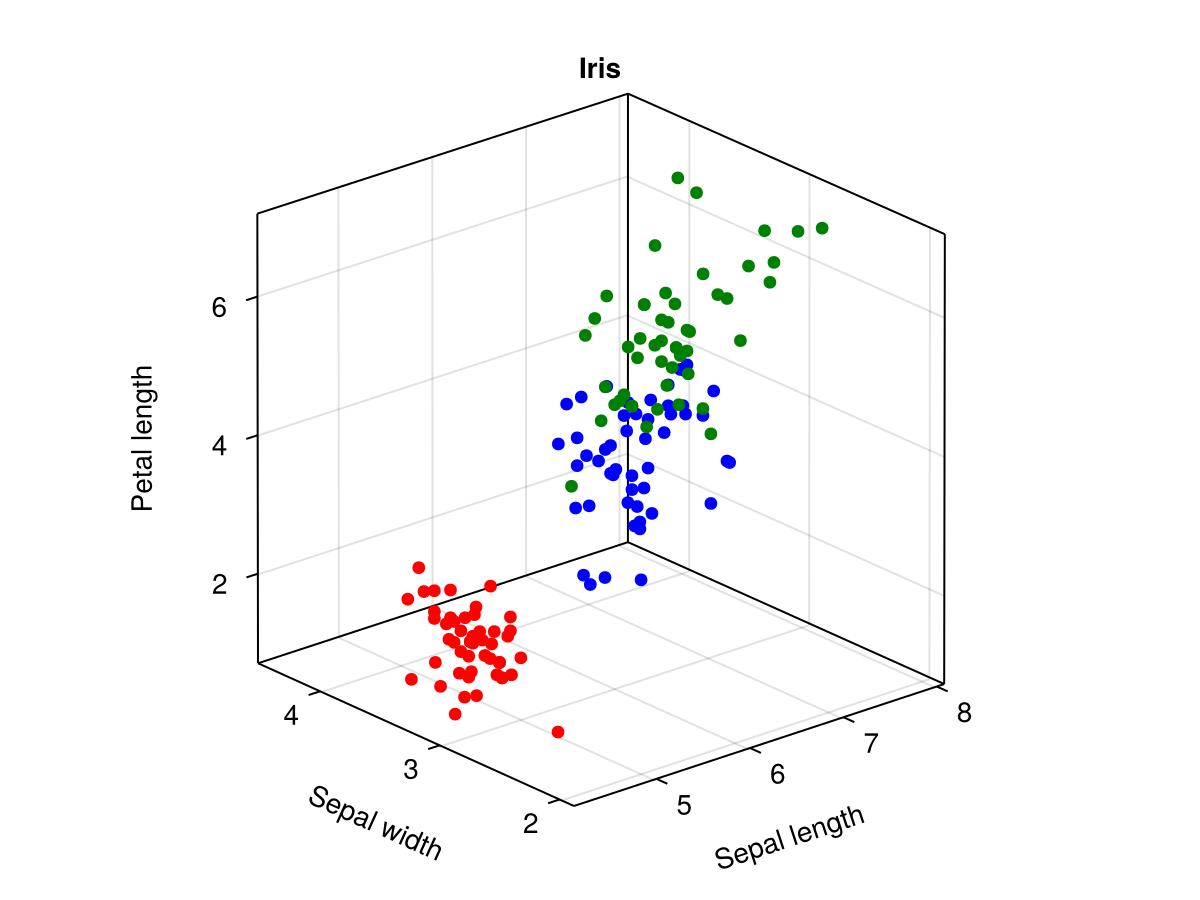

In [24]:
fig = Figure()
ax = Axis3(fig[1,1],
    aspect = (1,1,1),
    title = "Iris",
    xlabel = "Sepal length",
    ylabel = "Sepal width",
    zlabel = "Petal length")
scatter!(ax,x1, color=:red)
scatter!(ax,x2, color=:blue)
scatter!(ax,x3, color=:green)
fig